In [1]:
import numpy as np
from numpy import loadtxt
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from pyESN import ESN

In [13]:
def myMSE(prediction,target):
    return np.sqrt(np.mean((prediction.flatten() - target.flatten() )**2))

def residuals(prediction,target):
    return (target.flatten() - prediction.flatten())


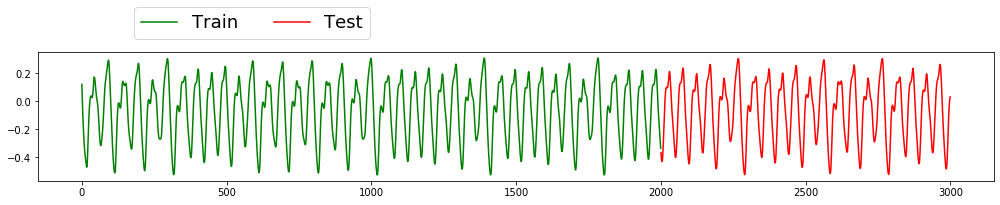

In [10]:
data = np.load('data/mackey_glass_t17.npy') 
data = data[:3000]

trainlen = 2000
testlen  =1000
# Input  data
tTrain = np.ones(trainlen)
xTest  = np.ones(testlen)
# Output data
ytrain = data[:trainlen]
ytest = data[trainlen:trainlen+testlen]

plt.figure(figsize=(14,3))
plt.plot(range(0,trainlen), ytrain,'g',label='Train')
plt.plot(range(trainlen,trainlen+testlen), ytest,'-r',label='Test')
plt.legend(loc=(0.1,1.1),fontsize=18,ncol=3)
plt.tight_layout()

In [7]:
# Setup the RC hyper-parameters
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.5,
          sparsity=.2,
          noise = 0.0001,
          random_state=42)

tTrain = np.ones(trainlen)
tTest  = np.ones(testlen)
# Output data
ytrain = data[:trainlen]
ytest = data[trainlen:trainlen+testlen]

# Train and predict 
yfit = esn.fit(tTrain,ytrain)
yhat = prediction = esn.predict(tTest)

In [15]:
# MSE in the training and testing
scoreTrain = myMSE(yfit,ytrain)
scoreTest = myMSE(yhat,ytest)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)

# Residuals 
resTrain = residuals(yfit,ytrain);
resTest = residuals(yhat,ytest);


Training mean square error:  1.9431297386648033e-05
Testing  mean square error:  0.02811981145803643


Text(-5.824999999999996, 0.5, 'Residuals')

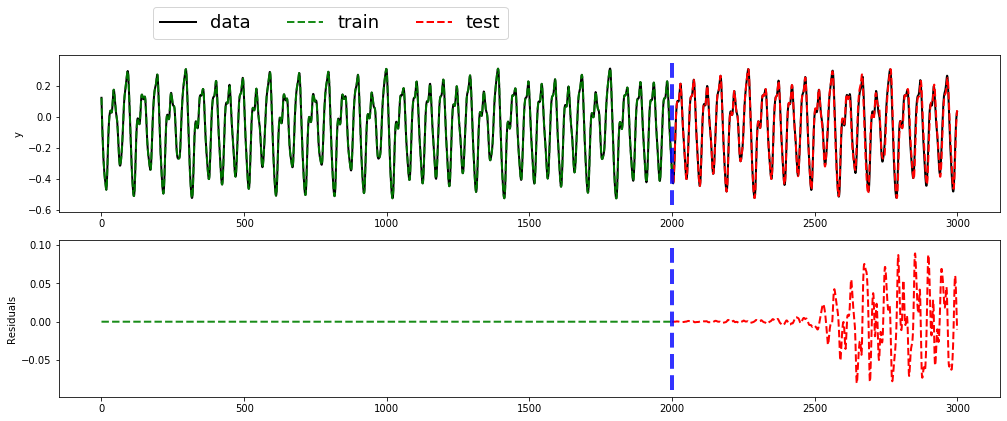

In [16]:
plt.figure(figsize=(14,6))
plt.subplot()
plt.subplot(2,1,1)
plt.plot(range(0,trainlen+testlen), data,'k',  linewidth=2, label="data")
plt.plot(range(0,trainlen),yfit,'--g',  linewidth=2, alpha=0.9, label="train")
plt.plot(range(trainlen,trainlen+testlen), yhat,'--r', linewidth=2,  alpha=1, label="test")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'--b',alpha=0.8, linewidth=4)
plt.tight_layout()
plt.ylabel('y')
plt.legend(loc=(0.1,1.1),fontsize=18,ncol=3)

plt.subplot(2,1,2)
plt.plot(range(0,trainlen),resTrain,'--g',  linewidth=2, alpha=0.9, label="train")
plt.plot(range(trainlen,trainlen+testlen), resTest,'--r', linewidth=2,  alpha=1, label="test")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'--b',alpha=0.8, linewidth=4)
plt.tight_layout()
plt.ylabel('Residuals')
